In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def visualizeLattice(nodes,struts,dpi=150):

    nodes = np.array(nodes)
    struts = np.array(struts)

    # Plot the lattice structure
    fig = plt.figure(dpi=dpi)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # Set the title using the file name
    ax.set_title('file_name')

    # Customize background color
    ax.set_facecolor((1, 1, 1))  # Light gray background
    ax.grid(True)

    # Plot nodes with a solid color (e.g., yellow with black edge)
    ax.scatter(nodes[:, 0], nodes[:, 1], nodes[:, 2], c='yellow', edgecolor='#000000', s=18)

    # Plot struts with a solid color (e.g., blue)
    for strut in struts:
        start_node = nodes[strut[0] - 1, :]
        end_node = nodes[strut[1] - 1, :]
        ax.plot([start_node[0], end_node[0]], 
                [start_node[1], end_node[1]], 
                [start_node[2], end_node[2]], 'blue', linewidth=0.9)

    #set the elevation (elev) and azimuth (azim) angles of the plot
    ax.view_init(elev=10, azim=10)  # these numbers can be adjust to shown figures with different viewing perspective
    
    # # Turn off the grid
    # ax.grid(False)
    
    plt.show()

In [4]:
def reformater(edges):
    connectivity = []
    if edges.shape[0] < 2:
        return []
    for j in range(edges.shape[1]):
        connectivity.append([edges[0,j],edges[1,j]])
    return connectivity

def read_pkl_file(file_path):
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    return data

In [5]:
data = read_pkl_file("/home/wzhan24/MetaMatDiff/datacreate/data.pkl")
idx = [200]
coords = []
connectivity = []
for index in idx:
    coords.append(np.array(data[index]['Nodal positions']).squeeze())
    connectivity.append(np.array(data[index]['Edge index']).squeeze())

In [6]:
data[0].keys()

dict_keys(['Name', 'Other name(s)', 'lengths', 'angles', 'Z_avg', 'Young', 'Shear', 'Poisson', 'Scaling constants', 'Scaling exponents', 'Nodal positions', 'Edge index'])

In [7]:
data[0]

{'Name': 'cub_Z06.0_E1',
 'Other name(s)': 'cub_Z06.0_R399, sqc1, pcu, primitive cubic lattice',
 'lengths': [1.0, 1.0, 1.0],
 'angles': [90.0, 90.0, 90.0],
 'Z_avg': 6.0,
 'Young': [0.00334, 0.00334, 0.00334],
 'Shear': [5.31e-06, 5.31e-06, 5.31e-06],
 'Poisson': [0.0, -0.0, 0.0, 0.0, -0.0, 0.0],
 'Scaling constants': [0.33, 0.33, 0.33],
 'Scaling exponents': [1.0, 1.0, 1.0],
 'Nodal positions': [[(0.0, 0.0, 0.0)],
  [(0.0, 1.0, 0.0)],
  [(1.0, 0.0, 0.0)],
  [(1.0, 1.0, 0.0)],
  [(0.0, 0.0, 1.0)],
  [(0.0, 1.0, 1.0)],
  [(1.0, 0.0, 1.0)],
  [(1.0, 1.0, 1.0)]],
 'Edge index': [[(0, 4)],
  [(0, 1)],
  [(0, 2)],
  [(1, 5)],
  [(1, 3)],
  [(2, 6)],
  [(2, 3)],
  [(3, 7)],
  [(4, 5)],
  [(4, 6)],
  [(5, 7)],
  [(6, 7)]]}

In [13]:
import torch
data[0]['Nodal positions']
np_data = np.array(data[0]['Nodal positions'])
noised_data = np_data + np.random.normal(0, 0.01, np_data.shape) * 10
print(noised_data)

[[[ 0.19529104  0.07944952 -0.08697301]]

 [[ 0.05072153  0.98340276 -0.05022183]]

 [[ 0.95240159 -0.17307607  0.03295781]]

 [[ 0.88868634  0.9655256  -0.21549157]]

 [[-0.01861989  0.09722323  1.00387759]]

 [[ 0.10915648  1.03692785  1.01088284]]

 [[ 0.95367883  0.00266154  0.83557284]]

 [[ 0.98700051  1.04430446  1.02379237]]]


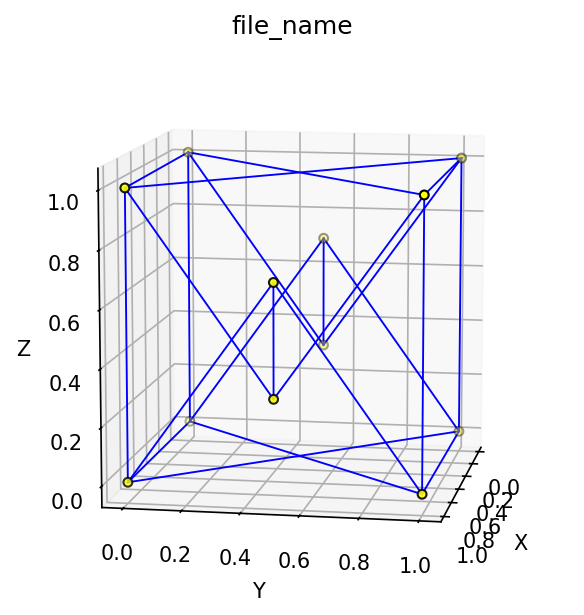

In [8]:
for i in range(len(coords)):
    visualizeLattice(coords[i],connectivity[i]+1)